In [130]:
# disable warnings to tidy up output
import warnings
warnings.filterwarnings("ignore")

# some basic libraries 
from platform import python_version
#import pandas as pd
#import seaborn as sns
import numpy as np
import os
import random

# plot support
import matplotlib.pyplot as plt
import soundfile as sf
import os
from google.cloud import storage
import glob

# scipy
import scipy

# reading audio datasets
import librosa
import librosa.display

[    2   247   462   767   985  1276  1603  1976  2207  2487  2722  3027
  3248  3521  3757  4116  4338  4558  4788  5078  5352  5677  5960  6180
  6487  6792  7016  7242  7484  7706  8038  8377  8707  9052  9270  9525
  9761 10000 10246 10640 10951 11207 11559 11781 12034 12262 12640 12923
 13256 13619 14109 14431 14839 15093 15765 16121 16341 16759 17043 17340
 17562 17890 18185 18418 18678 18932 19190 19412 19640 20008 20309 20577
 20808 21163 21387 21634 21906 22180 22418 22711 22948 23210 23554 23902
 24122 24393 25018 25361 25851 26208 26444 26694 26920 27275 27696 27914
 28245 28614 28833 29097 29330 29605 29835 30078 30300 30553 30817 31045
 31273 31508 31786 32213 32623 32955 33319 33574 33814 34056 34319 34547
 34789 35016 35337 35561 35793 36069 36457 36848 37140 37384 37744]
[4.64399093e-02 5.73532880e+00 1.07276190e+01 1.78097052e+01
 2.28716553e+01 2.96286621e+01 3.72215873e+01 4.58826304e+01
 5.12464399e+01 5.77480272e+01 6.32047166e+01 7.02868027e+01
 7.54184127e+01 8.1

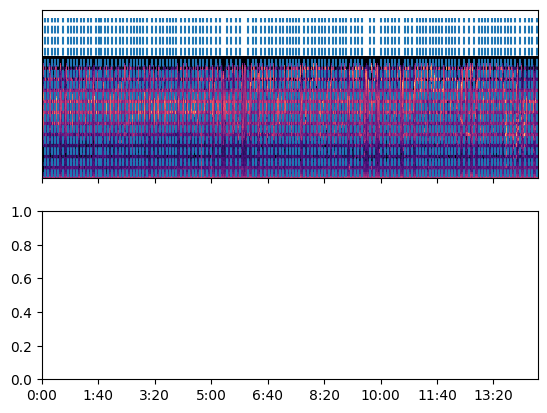

In [128]:
path = r'C:\Users\Tony\Documents\Data\3_Dataset_PE_2\Caligavis chrysops Yellow-faced honeyeater\X02647.wav'

y, sr = librosa.load(path)

ar = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

#img = librosa.display.specshow(ar, x_axis='time')


onset_frames = librosa.onset.onset_detect(y, sr=sr, backtrack = True, wait=215, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames)

onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

onset_samples = librosa.frames_to_samples(onset_frames)

fig, ax = plt.subplots(nrows=2, sharex=True)

S = librosa.stft(y)
logS = librosa.amplitude_to_db(abs(S))

S1 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, ax = ax[0],  x_axis='time')

Dp1 = librosa.pcen(S1, sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)
#librosa.display.specshow(Dp1, ax = ax[1])
ax[0].vlines(onset_times, 0, S.max()*2 , linestyle='dashed')
ax[0].label_outer()

In [137]:
# location of files stored locally
local_path = r'C:\Users\Tony\Documents\Data\3_Dataset_PE_2'
dest_path = r'C:\Users\Tony\Documents\Data\3_Dataset_PE_3'

# Iterate through local folder to pull files to upload to cloud

for local_folder in glob.glob(local_path + '/**'):
    folder_name =  os.path.basename(local_folder)
    for local_file in glob.glob(local_folder + '/**'):
        file_name = os.path.basename(local_file).split('.')[0]
        ext = os.path.basename(local_file).split('.')[1]
        y, sr = librosa.load(local_file)
        onset_frames = librosa.onset.onset_detect(y, sr=sr, backtrack = True, wait=215, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
        onset_samples = librosa.frames_to_samples(onset_frames)
            
        for i in range(min(len(onset_samples)-1, 20)):
            start = onset_samples[i]
            end = onset_samples[i+1]
            path = os.path.join(dest_path, folder_name, file_name+"-"+str(i)+ "."+ ext)
            if end > start + (22050*5):
                segment = y[start: start + (22050*5)]
            else:
                segment = y[start: end]
            
            sf.write(path, segment, 22050)
            


IndexError: list index out of range

In [129]:

for i in range(min(len(onset_samples)-1, 20)):
    start = onset_samples[i]
    end = onset_samples[i+1]
    path = str(i) + '.wav'
    if end > start + (22050*5):
        segment = y[start: start + (22050*5)]
    else:
        segment = y[start: end]
    
    sf.write(path, segment, 22050)
    

In [157]:
# Nuke half the files
target_dir = r'C:\Users\Tony\Documents\Data\3_Dataset_PE_3\sus scrofa Wild pig'
import random
dir=os.listdir(target_dir)
for file in random.sample(dir, int(len(dir)*0.5)): # enter percentage of files to be nuked 
    os.remove(os.path.join(target_dir, file))



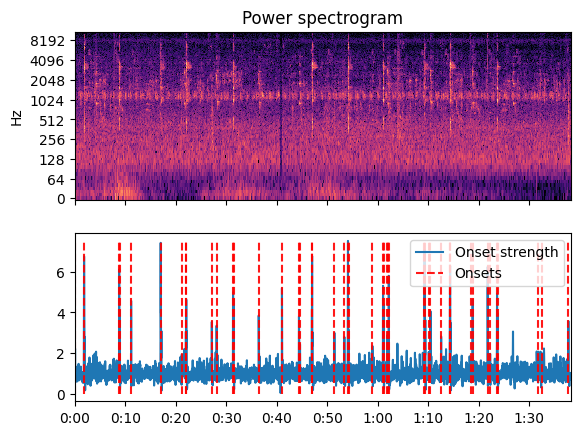

In [47]:
D = np.abs(librosa.stft(y))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')

ax[1].legend()